# Use simulated price to show the idea behind pair trading
## See slides for explanations

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


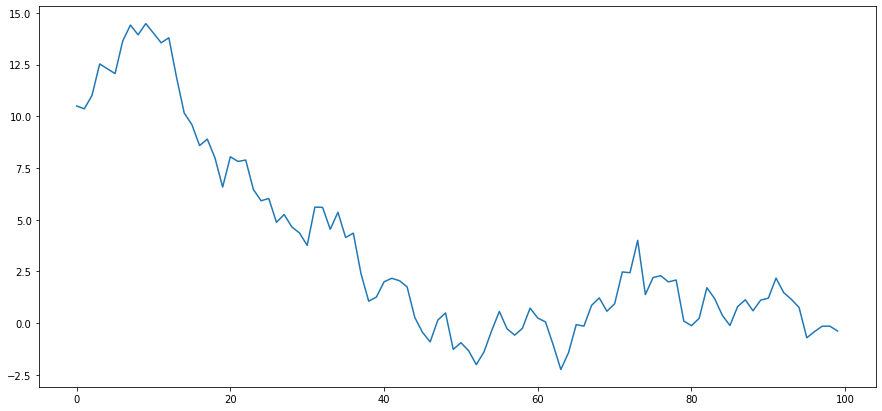

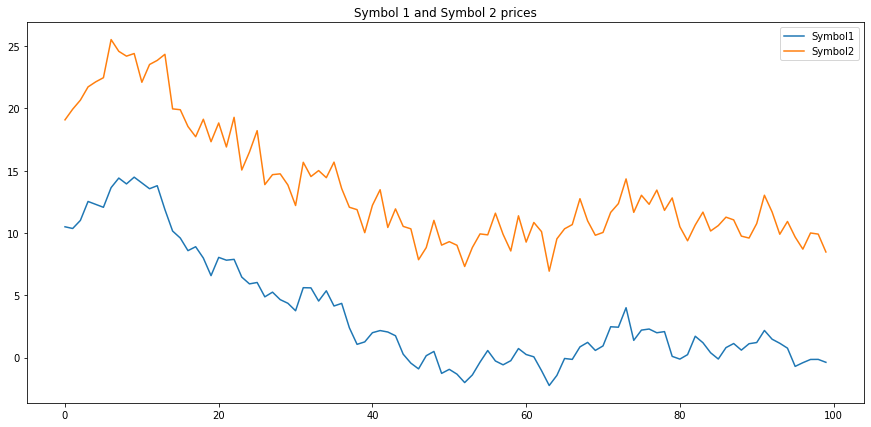

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

from statsmodels.tsa.stattools import coint

# Set a seed value to make the experience reproducible
np.random.seed(42)

# Generate Symbol1 daily returns
Symbol1_returns = np.random.normal(0, 1, 100)
# Create a series for Symbol1 prices
Symbol1_prices = pd.Series(np.cumsum(Symbol1_returns),\
                           name='Symbol1') + 10
Symbol1_prices.plot(figsize=(15,7))
plt.show()

# Create a series for Symbol2 prices
# We are going to mimikate the Symbol1 behavior
noise = np.random.normal(0, 1, 100)
Symbol2_prices = Symbol1_prices + 10 + noise
Symbol2_prices.name = 'Symbol2'


plt.title("Symbol 1 and Symbol 2 prices")
Symbol1_prices.plot(figsize=(15,7))
Symbol2_prices.plot(figsize=(15,7))
plt.legend()
plt.show()


#### In statistics, the standard-, or Z-score is the number of standard deviations by which the value of a raw score is above or below the mean value of what is being observed or measured. Raw scores above the mean have positive standard scores, while those below the mean have negative standard scores

P-value:
 1.067239568675346e-17


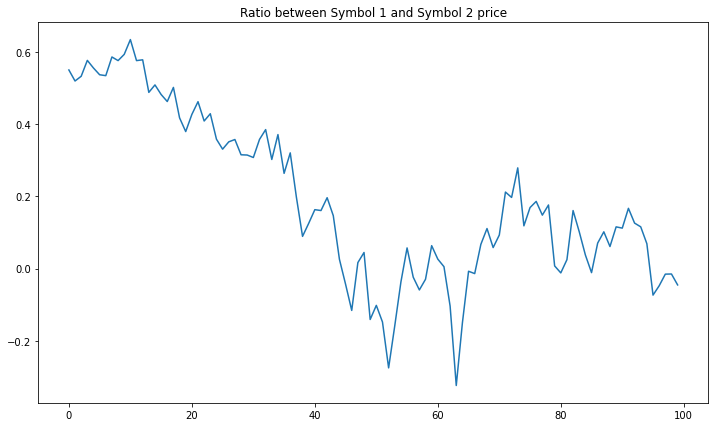

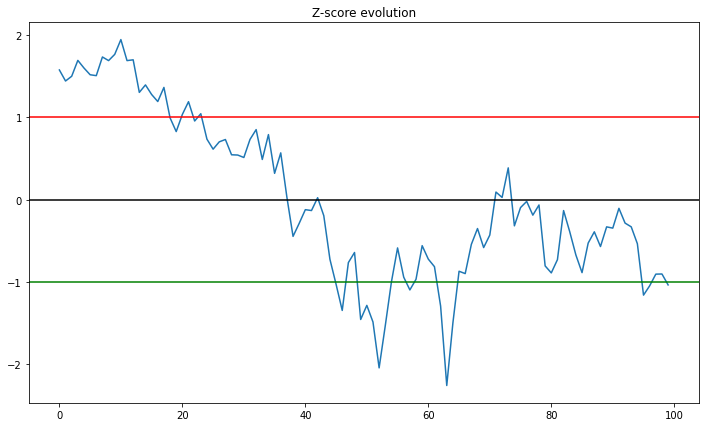

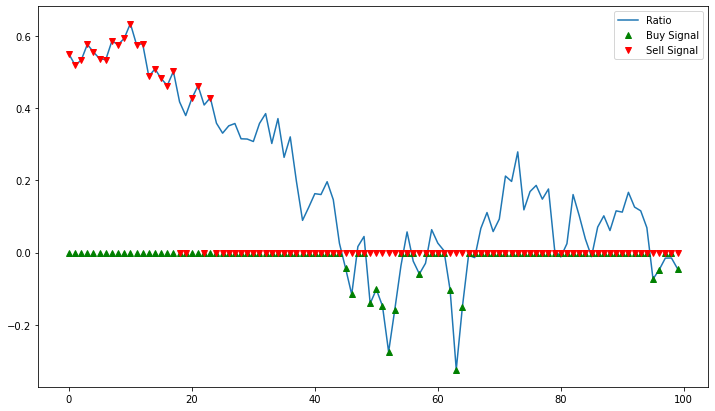

In [3]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

score, pvalue, _ = coint(Symbol1_prices, Symbol2_prices)
print('P-value:\n', pvalue)

ratios = Symbol1_prices / Symbol2_prices
plt.title("Ratio between Symbol 1 and Symbol 2 price")

ratios.plot(figsize=(12,7))
plt.savefig('ratio-plot.jpg')
plt.show()

#show the ration 1 std away
zscore(ratios).plot(figsize=(12,7))
plt.title("Z-score evolution")
plt.axhline(zscore(ratios).mean(),color="black")
plt.axhline(1.0, color="red")
plt.axhline(-1.0, color="green")
plt.savefig('z-score-range.jpg')
plt.show()

ratios.plot(figsize=(12,7))
buy = ratios.copy()
sell = ratios.copy()
buy[zscore(ratios)>-1] = 0
sell[zscore(ratios)<1] = 0
buy.plot(color="g", linestyle="None", marker="^")
sell.plot(color="r", linestyle="None", marker="v")

plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.savefig('z-score.jpg')
plt.show()

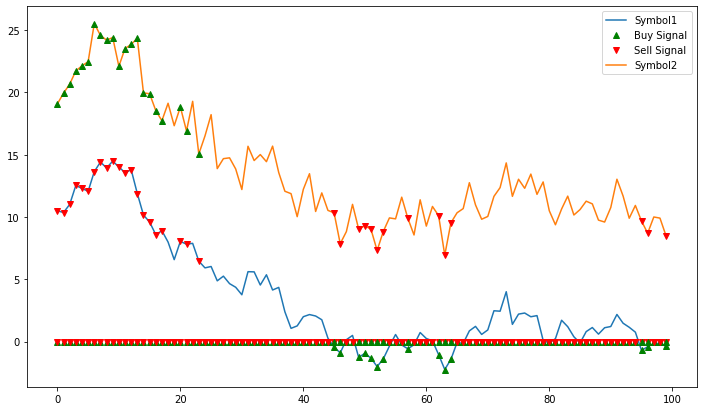

In [4]:
symbol1_buy=Symbol1_prices.copy()
symbol1_sell=Symbol1_prices.copy()
symbol2_buy=Symbol2_prices.copy()
symbol2_sell=Symbol2_prices.copy()

Symbol1_prices.plot(figsize=(12,7))
symbol1_buy[zscore(ratios)>-1] = 0
symbol1_sell[zscore(ratios)<1] = 0
symbol1_buy.plot(color="g", linestyle="None", marker="^")
symbol1_sell.plot(color="r", linestyle="None", marker="v")

Symbol2_prices.plot(figsize=(12,7))
symbol2_buy[zscore(ratios)<1] = 0
symbol2_sell[zscore(ratios)>-1] = 0
symbol2_buy.plot(color="g", linestyle="None", marker="^")
symbol2_sell.plot(color="r", linestyle="None", marker="v")

plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
plt.savefig('pairtrading-b&s.jpg')
plt.show()

# Example: Pair Trading

module 'statsmodels' is installed
module 'yfinance' is not installed
     |████████████████████████████████| 63 kB 839 kB/s 
     |████████████████████████████████| 6.4 MB 10.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
[*********************100%***********************]  11 of 11 completed
[('ADBE', 'MSFT'), ('IBM', 'JNPR')]


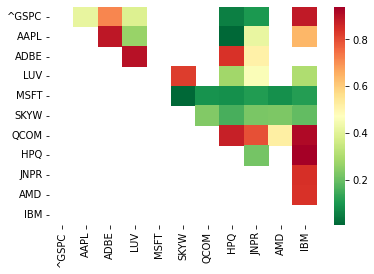

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

import seaborn

try:
    import statsmodels
    print("module 'statsmodels' is installed")
except ModuleNotFoundError:
    print("module 'statsmodels' is not installed")
    !pip install statsmodels
from statsmodels.tsa.stattools import coint

try:
    import yfinance
    print("module 'yfinance' is installed")
except ModuleNotFoundError:
    print("module 'yfinance' is not installed")
    !pip install yfinance

import yfinance as yf

tickers = ['^GSPC','AAPL','ADBE','LUV','MSFT', 'SKYW','QCOM', 'HPQ','JNPR','AMD','IBM']

start_date='2010-01-01'
end_date = '2021-12-01'

data=yf.download(tickers,start_date, end_date).dropna()

def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.02:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs


pvalues, pairs = find_cointegrated_pairs(data['Adj Close'])
print(pairs)

sns_plot=seaborn.heatmap(pvalues, xticklabels=tickers,
                yticklabels=tickers, cmap='RdYlGn_r',
                   mask = (pvalues >= 0.98))
fig=sns_plot.get_figure()
fig.savefig('correlation.jpg')
plt.show()

## Now choose ADBE and MSFT

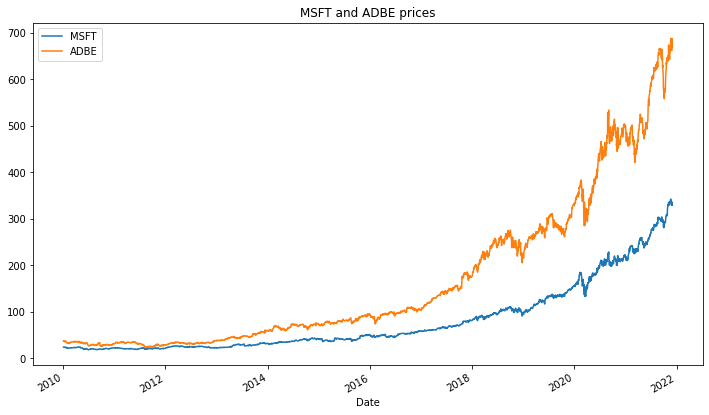

In [6]:
Symbol1_prices = data['Adj Close']['MSFT']
Symbol2_prices = data['Adj Close']['ADBE']
#Symbol2_prices.name = 'ADBE'
plt.title("MSFT and ADBE prices")
Symbol1_prices.plot(figsize=(12,7))
Symbol2_prices.plot()
plt.legend()
plt.savefig('MSFT+ADBE.jpg')
plt.show()



## Define the Z-score

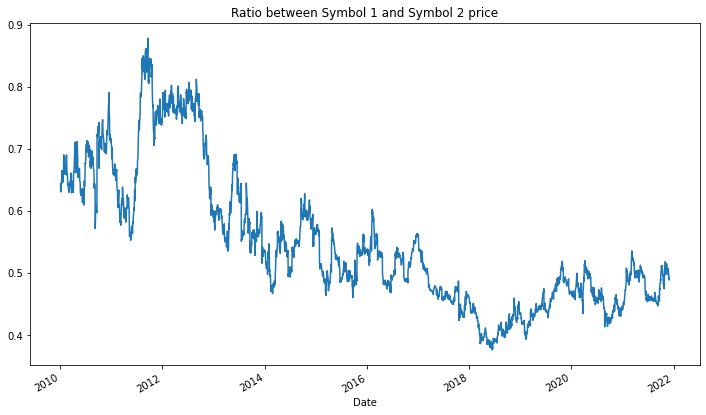

In [7]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

ratios = Symbol1_prices / Symbol2_prices
plt.title("Ratio between Symbol 1 and Symbol 2 price")

ratios.plot(figsize=(12,7))
plt.show()

## Identify the Buy/Sell signals

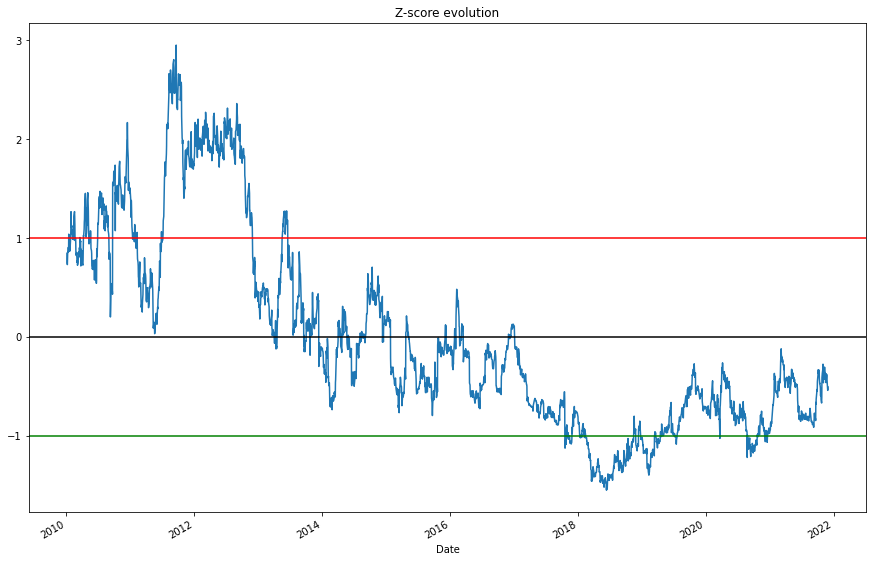

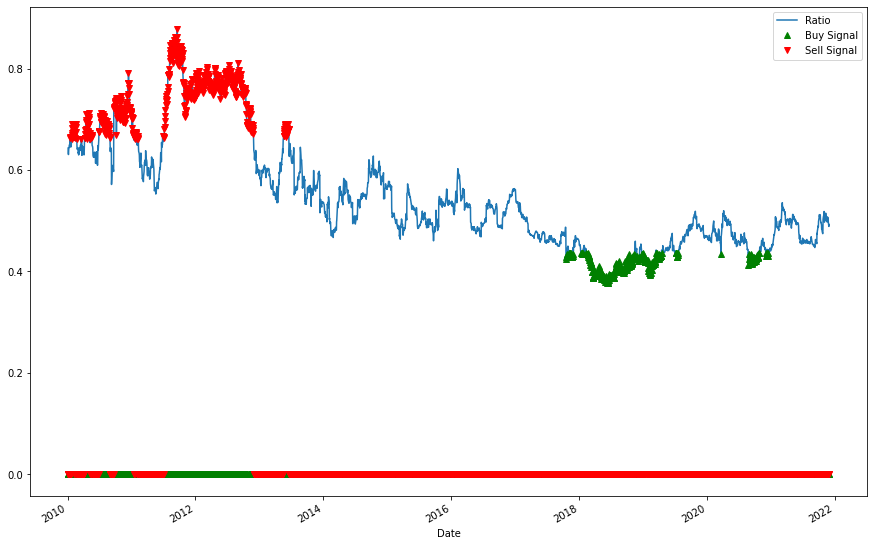

In [8]:
#Choose k=1
zscore(ratios).plot(figsize=(15,10))
plt.title("Z-score evolution")
plt.axhline(zscore(ratios).mean(),color="black")
plt.axhline(1.0, color="red")
plt.axhline(-1.0, color="green")
plt.show()

ratios.plot(figsize=(15,10))
buy = ratios.copy()
sell = ratios.copy()
buy[zscore(ratios)>-1] = 0
sell[zscore(ratios)<1] = 0
buy.plot(color="g", linestyle="None", marker="^")
sell.plot(color="r", linestyle="None", marker="v")
plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.show()

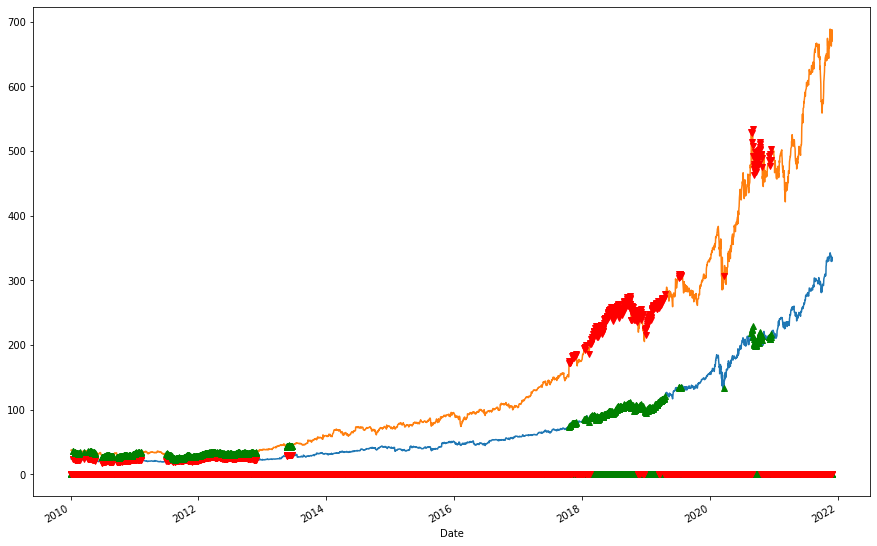

In [9]:
symbol1_buy=Symbol1_prices.copy()
symbol1_sell=Symbol1_prices.copy()
symbol2_buy=Symbol2_prices.copy()
symbol2_sell=Symbol2_prices.copy()

Symbol1_prices.plot(figsize=(15,10))
symbol1_buy[zscore(ratios)>-1] = 0
symbol1_sell[zscore(ratios)<1] = 0
symbol1_buy.plot(color="g", linestyle="None", marker="^")
symbol1_sell.plot(color="r", linestyle="None", marker="v")

Symbol2_prices.plot(figsize=(15,10))
symbol2_buy[zscore(ratios)<1] = 0
symbol2_sell[zscore(ratios)>-1] = 0
symbol2_buy.plot(color="g", linestyle="None", marker="^")
symbol2_sell.plot(color="r", linestyle="None", marker="v")
plt.savefig('MSFT-ADBE-buy-sell.jpg')
plt.show()

## Backtesting the strategy
### See slides for the exit strategy

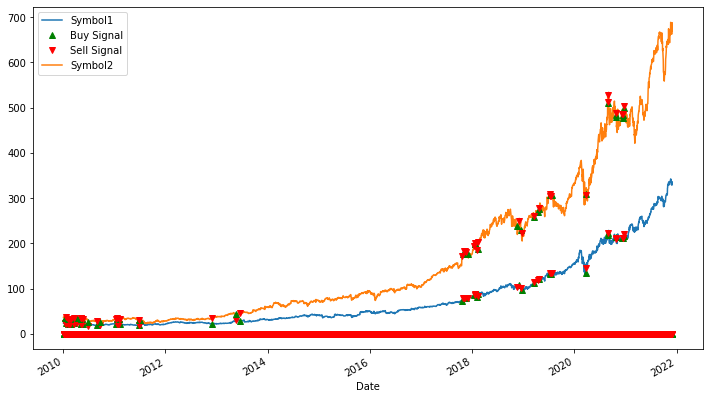

In [10]:

pair_correlation_trading_strategy = pd.DataFrame(index=Symbol1_prices.index)
pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))


position=0
for i in range(len(Symbol1_prices)):
    s1price=Symbol1_prices[i]
    s2price=Symbol2_prices[i]
    if not position and symbol1_buy[i]!=0:
        pair_correlation_trading_strategy['symbol1_buy'][i]=s1price
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
        position=1
    elif not position and symbol1_sell[i]!=0:
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
        position = -1
    elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_buy'][i] = s1price
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
        position = 0
    elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
        position = 0

Symbol1_prices.plot(figsize=(12,7))
pair_correlation_trading_strategy['symbol1_buy'].plot(color="g", linestyle="None", marker="^")
pair_correlation_trading_strategy['symbol1_sell'].plot(color="r", linestyle="None", marker="v")
Symbol2_prices.plot()
pair_correlation_trading_strategy['symbol2_buy'].plot(color="g", linestyle="None", marker="^")
pair_correlation_trading_strategy['symbol2_sell'].plot(color="r", linestyle="None", marker="v")

plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
plt.savefig('MSFT-ADBE-pair-strategy.jpg')
plt.show()

In [13]:
pair_correlation_trading_strategy[:20]

,symbol1_price,symbol1_buy,symbol1_sell,symbol2_buy,symbol2_sell,symbol1_position,symbol2_position,total_position
Date,,,,,,,,
2010-01-04,23.855656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,23.863365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-06,23.716919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-07,23.470270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-08,23.632135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-11,23.331532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-12,23.177368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-13,23.393185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-14,23.863365,0.000000,23.863365,35.900002,0.000000,-23.863365,35.900002,12.036636


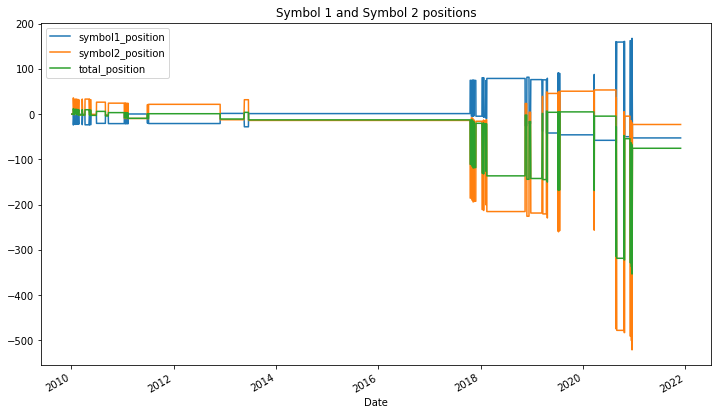

-75.46032905578613


In [12]:
#position
#assume that we only buy/sell one share, regardless of the price deifference
pair_correlation_trading_strategy['symbol1_position']=\
pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

pair_correlation_trading_strategy['symbol2_position']=\
pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

pair_correlation_trading_strategy['symbol1_position'].cumsum().plot(figsize=(15,10))
pair_correlation_trading_strategy['symbol2_position'].cumsum().plot(figsize=(15,10))

pair_correlation_trading_strategy['total_position']=\
pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
pair_correlation_trading_strategy['total_position'].cumsum().plot(figsize=(12,7))
plt.title("Symbol 1 and Symbol 2 positions")
plt.legend()
plt.show()
print(pair_correlation_trading_strategy['total_position'].cumsum()[-1])